In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv('possum.csv')

df = df.dropna() # drop null values

<AxesSubplot:>

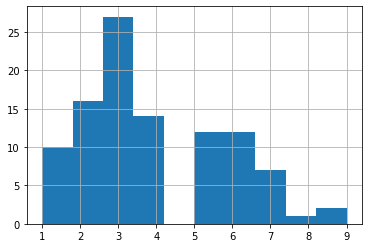

In [43]:
# plot data
df.age.hist()

<AxesSubplot:>

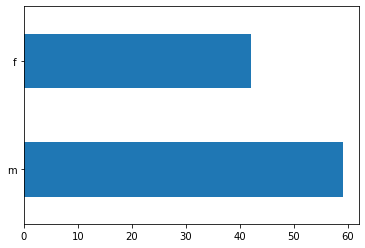

In [44]:
df.sex.value_counts().plot(kind='barh')


<AxesSubplot:>

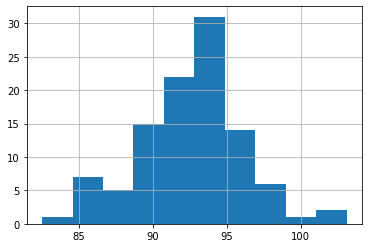

In [24]:
df.hdlngth.hist()


In [45]:
# One-hot encode the dataFrame
df_one_hot = pd.get_dummies(df)
df_one_hot

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0,0,1
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0,1,0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0,1,0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0,1,0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0,1,0,1
100,101,7,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0,1,0,1
101,102,7,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0,1,1,0
102,103,7,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0,1,0,1


In [46]:
# Use age as the target
y = df_one_hot.pop('age')

In [47]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(df_one_hot, y)

In [48]:
len(X_train), len(X_test), len(y_train), len(y_test)

(75, 26, 75, 26)

## Build model 1 for the data above

In [50]:
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# Fit the model
history = model_1.fit(X_train, y_train, epochs=200)


Epoch 1/200
3/3 [==============================] - 8s 21ms/step - loss: 4.8415 - mae: 4.8415
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 3.0444 - mae: 3.0444
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 2.8494 - mae: 2.8494
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 1.9981 - mae: 1.9981
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 1.4590 - mae: 1.4590
Epoch 6/200
3/3 [==============================] - 0s 33ms/step - loss: 1.5881 - mae: 1.5881
Epoch 7/200
3/3 [==============================] - 0s 42ms/step - loss: 1.5678 - mae: 1.5678
Epoch 8/200
3/3 [==============================] - 0s 41ms/step - loss: 1.3964 - mae: 1.3964
Epoch 9/200
3/3 [==============================] - 0s 23ms/step - loss: 1.4328 - mae: 1.4328
Epoch 10/200
3/3 [==============================] - 0s 22ms/step - loss: 1.4072 - mae: 1.4072
Epoch 11/200
3/3 [==============================] - 0s 20ms/step - lo

In [52]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 341ms/step - loss: 1.4570 - mae: 1.4570


[1.4569929838180542, 1.4569929838180542]

In [56]:
pred = X_test.loc[0]

In [70]:
y_test

93    7.0
28    3.0
25    7.0
39    3.0
7     6.0
10    9.0
0     8.0
48    4.0
73    4.0
26    2.0
41    3.0
98    3.0
97    5.0
19    4.0
23    2.0
67    5.0
75    5.0
5     1.0
76    6.0
91    2.0
80    3.0
82    3.0
81    4.0
90    3.0
70    6.0
85    3.0
Name: age, dtype: float64

In [69]:

model_1.predict(X_test)

1/1 [==============================] - 0s 72ms/step


array([[4.482309 ],
       [2.584026 ],
       [3.15881  ],
       [1.8058993],
       [5.0253515],
       [4.571172 ],
       [5.5149198],
       [3.7753823],
       [2.7953572],
       [2.337731 ],
       [3.0443401],
       [4.0172076],
       [4.454092 ],
       [3.5091841],
       [2.8790848],
       [2.4917543],
       [2.2344804],
       [5.232657 ],
       [3.8518221],
       [2.1870694],
       [3.1446228],
       [2.5695763],
       [2.904451 ],
       [3.379495 ],
       [2.8412952],
       [2.7705083]], dtype=float32)

In [76]:
# Try normalizing data and see how the model performs
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


<AxesSubplot:ylabel='Frequency'>

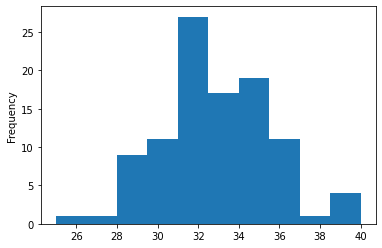

In [86]:
df['belly'].plot(kind='hist')


In [77]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [90]:
# Create a column transformer
ct = make_column_transformer(
    # turn all values in these columns between 0 and 1, usually for numeric values
    (MinMaxScaler(), ['hdlngth', 'skullw',
     'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']),
    (OneHotEncoder(handle_unknown='ignore'),
     ['Pop', 'sex',]),  # turn
)

# Get y
y = df.pop('age')

# Split train and test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df, y, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train_2)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train_2)
X_test_normal = ct.transform(X_test_2)


In [97]:
X_train_normal, X_train_2

(array([[0.13592233, 0.22043011, 0.09302326, 0.        , 0.13636364,
         0.66442953, 0.16666667, 0.38888889, 0.53333333, 1.        ,
         0.        , 0.        , 1.        ],
        [0.48058252, 0.3655914 , 0.65116279, 0.81818182, 0.23863636,
         0.34228188, 1.        , 0.44444444, 0.53333333, 0.        ,
         1.        , 0.        , 1.        ],
        [0.45145631, 0.43010753, 0.6744186 , 0.5       , 0.60227273,
         0.81208054, 0.29166667, 0.61111111, 0.46666667, 1.        ,
         0.        , 1.        , 0.        ],
        [0.33980583, 0.32258065, 0.30232558, 0.40909091, 0.32386364,
         0.36912752, 0.375     , 0.11111111, 0.13333333, 0.        ,
         1.        , 0.        , 1.        ],
        [0.60194175, 0.30107527, 0.79069767, 0.31818182, 0.64772727,
         0.65100671, 0.47916667, 0.66666667, 0.53333333, 1.        ,
         0.        , 1.        , 0.        ],
        [0.44174757, 0.35483871, 0.62790698, 0.5       , 0.23863636,
         0.

## Recreate model_1 on the normalized data as model_2

In [108]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# Fit the model
history = model_2.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
3/3 [==============================] - 2s 8ms/step - loss: 3.7477 - mae: 3.7477
Epoch 2/200
3/3 [==============================] - 0s 9ms/step - loss: 3.4181 - mae: 3.4181
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 3.0727 - mae: 3.0727
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 2.6429 - mae: 2.6429
Epoch 5/200
3/3 [==============================] - 0s 14ms/step - loss: 2.1304 - mae: 2.1304
Epoch 6/200
3/3 [==============================] - 0s 9ms/step - loss: 1.6190 - mae: 1.6190
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 1.5640 - mae: 1.5640
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 1.7568 - mae: 1.7568
Epoch 9/200
3/3 [==============================] - 0s 11ms/step - loss: 1.6383 - mae: 1.6383
Epoch 10/200
3/3 [==============================] - 0s 8ms/step - loss: 1.5156 - mae: 1.5156
Epoch 11/200
3/3 [==============================] - 0s 9ms/step - loss: 1.489

In [109]:
model_2.evaluate(X_test_normal, y_test_2)

1/1 [==============================] - 0s 168ms/step - loss: 1.6491 - mae: 1.6491


[1.6490609645843506, 1.6490609645843506]

In [101]:
y_test_2

87     2.0
58     2.0
69     7.0
70     6.0
48     4.0
39     3.0
22     4.0
47     5.0
10     9.0
0      8.0
18     5.0
30     3.0
100    1.0
33     2.0
80     3.0
4      2.0
96     3.0
81     4.0
12     5.0
31     4.0
79     1.0
92     3.0
26     2.0
44     3.0
73     4.0
15     4.0
Name: age, dtype: float64

In [102]:
model_2.predict(X_test_normal)

1/1 [==============================] - 0s 106ms/step


array([[3.9210513],
       [4.8230114],
       [2.1195855],
       [5.392409 ],
       [5.074218 ],
       [3.5371556],
       [4.213054 ],
       [4.111602 ],
       [5.1233473],
       [3.209913 ],
       [3.4314613],
       [1.5727627],
       [5.2362423],
       [1.1178796],
       [3.5669184],
       [3.7895174],
       [3.9024065],
       [4.614791 ],
       [2.3070793],
       [4.8889046],
       [5.498162 ],
       [3.5919552],
       [2.199984 ],
       [2.094057 ],
       [4.01713  ],
       [1.7314467]], dtype=float32)

Text(0.5, 0, 'epochs')

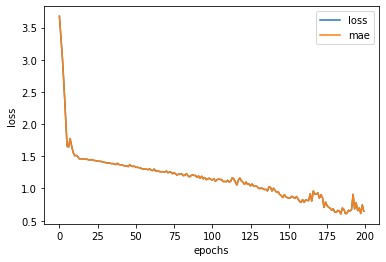

In [103]:
# Plot graph for the fitting of the model
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
